In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stats
from scipy.stats import kruskal 
from scipy.stats import levene
from scipy.stats import yeojohnson, skew
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import shapiro

In [5]:
df = pd.read_csv("bike_sharing.csv")

In [7]:
df.shape

(10886, 12)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        10886 non-null  datetime64[ns]
 1   season          10886 non-null  int64         
 2   holiday         10886 non-null  int64         
 3   workingday      10886 non-null  int64         
 4   weather         10886 non-null  int64         
 5   temp            10886 non-null  float64       
 6   atemp           10886 non-null  float64       
 7   humidity        10886 non-null  int64         
 8   windspeed       10886 non-null  float64       
 9   casual          10886 non-null  int64         
 10  registered      10886 non-null  int64         
 11  count           10886 non-null  int64         
 12  Time_divisions  10886 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(8)
memory usage: 1.0 MB


In [9]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# OBSERVATIONS

1, The shape of the data is 12 columns and 10886 rows.

2, The information of the columns is season,weather, holiday,workingday these columns are object but its shows int type and the datetime columns show 
    object it convert into timestamps typeusing pandas.
    
3, the target variable count is there are some outliers are there because 78% of the data os below 284 bike are rents but the max is 977 bikes are rented.

4, There is no Nan values inthis dataset.

### Converting Timestamp

In [11]:
df["datetime"] = pd.to_datetime(df["datetime"])

### Creating Bins For Using TimeStamp

In [12]:

bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df["Time_divisions"] = pd.cut(x = df["datetime"].dt.hour,bins = bins,labels = labels,include_lowest=True,right=False)

### Boxplot

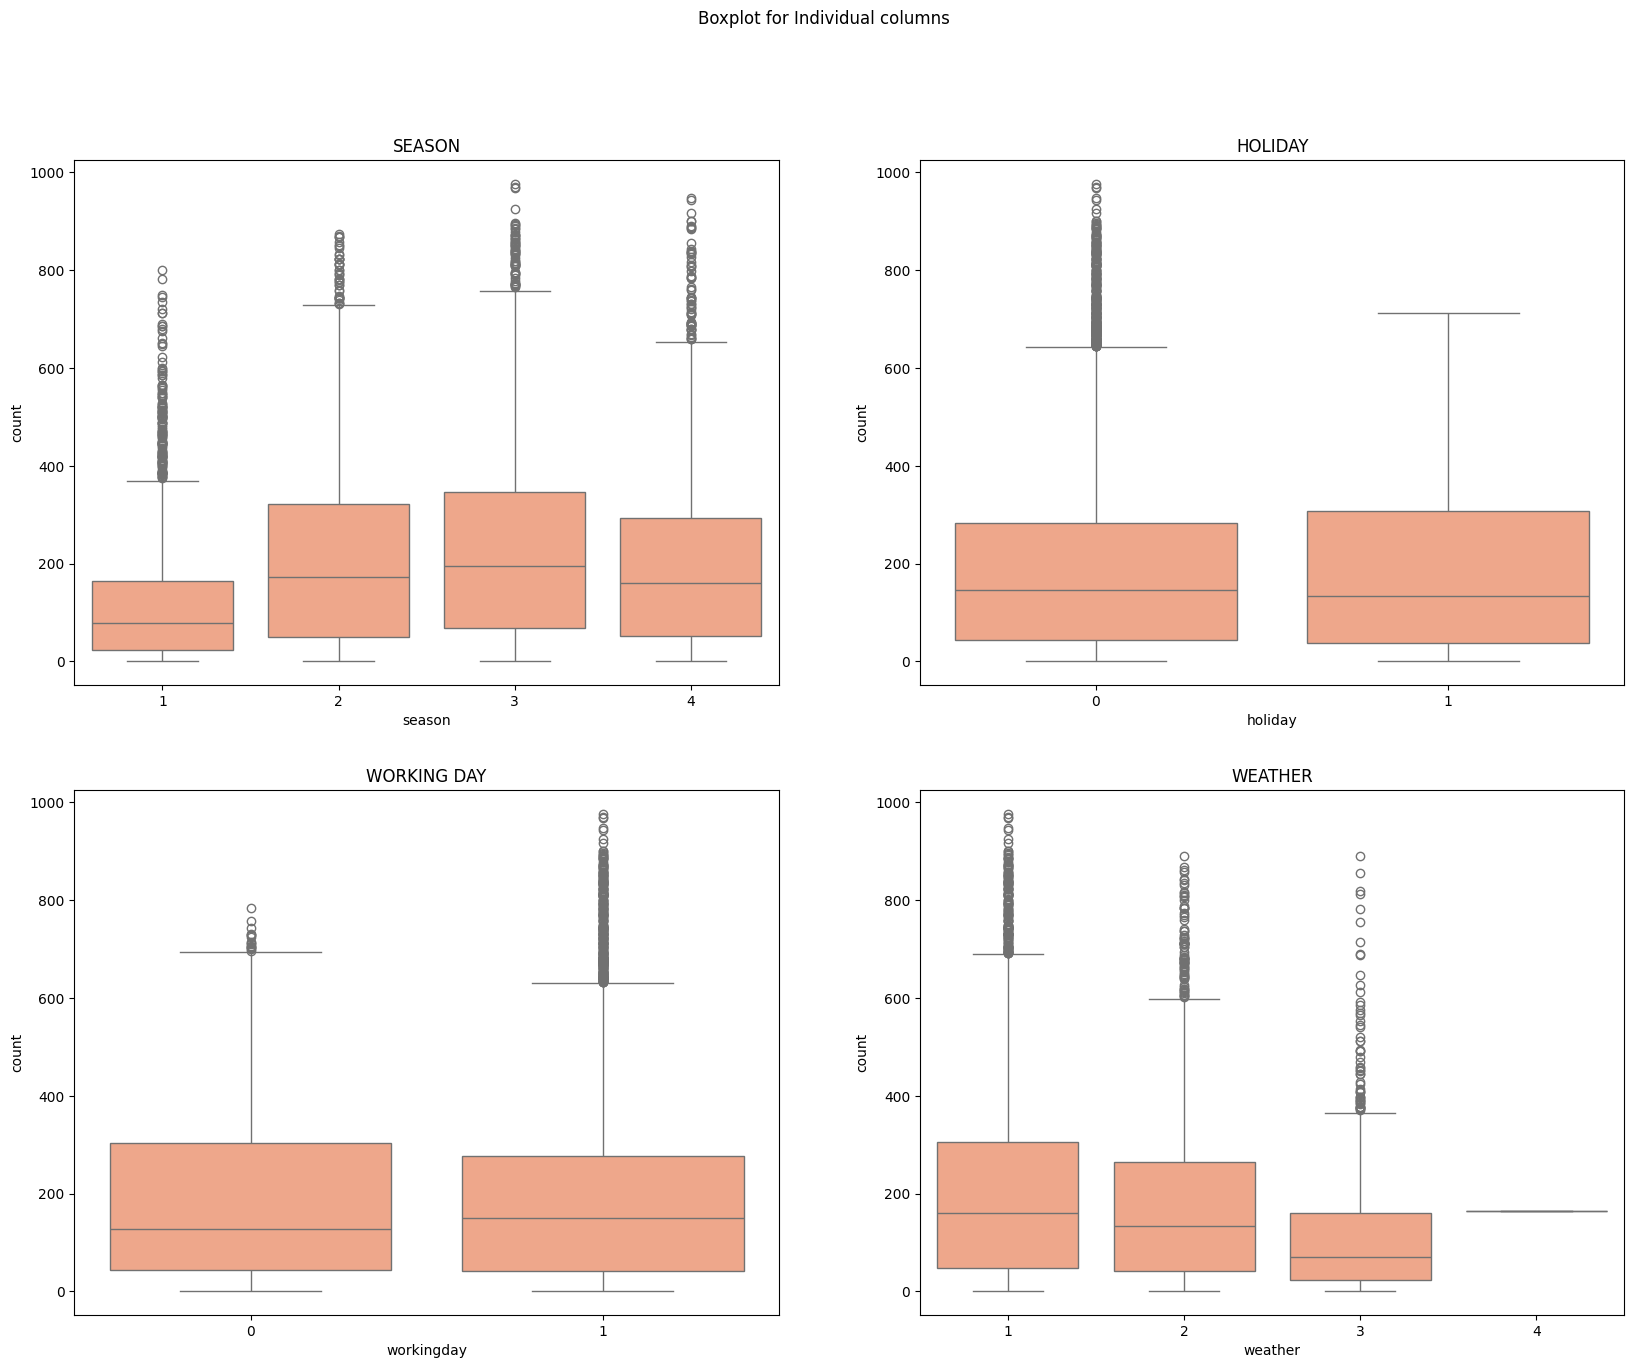

In [13]:
plt.figure(figsize =(20,15))

plt.subplot(2,2,1)
sns.boxplot(data = df,x = "season",y = "count",color = "lightsalmon")
plt.title("SEASON")

plt.subplot(2,2,2)
sns.boxplot(data = df,x = "holiday",y = "count",color = "lightsalmon")
plt.title("HOLIDAY")


plt.subplot(2,2,3)
sns.boxplot(data = df,x = "workingday",y = "count",color = "lightsalmon")
plt.title("WORKING DAY")

plt.subplot(2,2,4)
sns.boxplot(data = df,x = "weather",y = "count",color = "lightsalmon")
plt.title("WEATHER")

plt.suptitle("Boxplot for Individual columns")
plt.show()

### No of Bike Rent Between Different Weather

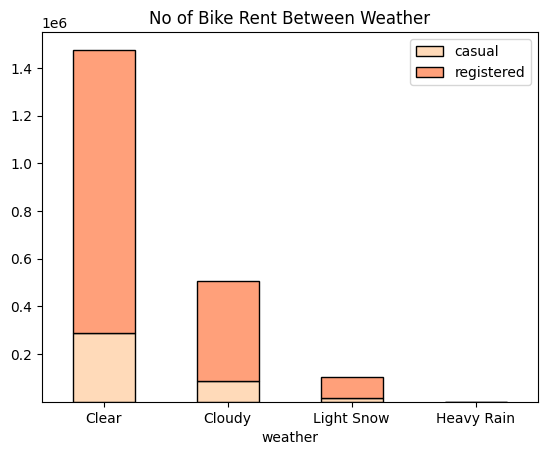

In [14]:
weather = df.groupby(by = ["weather"]).agg({"casual":"sum","registered":"sum"})
val = weather.plot(kind = "bar",stacked = True,edgecolor = "black",color = ["peachpuff","lightsalmon"])
new_labels = ['Clear', 'Cloudy', 'Light Snow', 'Heavy Rain']
plt.xticks(ticks=[0, 1, 2, 3], labels=new_labels,rotation=0)
plt.title("No of Bike Rent Between Weather")
plt.show()

### OBSERVATIONS
Clear Weather: It has the highest number of rentals for both casual and registered users. People prefer biking when the weather is clear.

Cloudy Weather: The number of rentals decreases compared to clear weather but is still relatively high.

Light Snow: Rentals drop further during light snow, indicating that adverse weather affects biking behavior.

Heavy Rain: This condition has the fewest rentals. People are less likely to bike in heavy rain.

### No of Bike Rent Between Different Season

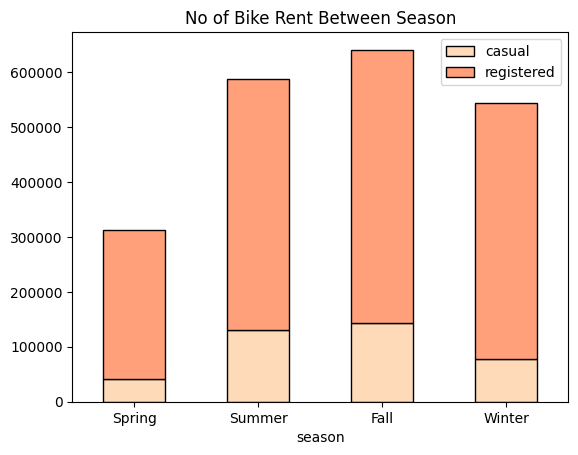

In [15]:
season = df.groupby(by = ["season"]).agg({"casual":"sum","registered":"sum"})
val = season.plot(kind = "bar",stacked = True,edgecolor = "black",color = ["peachpuff","lightsalmon"])
new_labels = ['Spring', 'Summer', 'Fall', 'Winter']
plt.xticks(ticks=[0, 1, 2, 3], labels=new_labels,rotation=0)
plt.title("No of Bike Rent Between Season")
plt.show()

### OBSERVATIONS

Summer and Fall: These seasons have the highest bike rentals overall.
    
Registered Rentals Dominance: Registered users consistently rent more bikes than casual users across all seasons.

Winter: The lowest rentals occur during winter, likely due to weather conditions.

### No of Bike Rent Between workingday

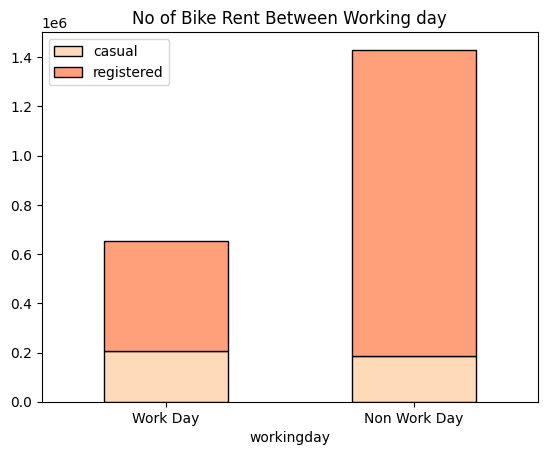

In [16]:
workingday = df.groupby(by = ["workingday"]).agg({"casual":"sum","registered":"sum"})
workingday.plot(kind = "bar",stacked = True,edgecolor = "black",color = ["peachpuff","lightsalmon"])
new_labels = ["Work Day","Non Work Day"]
plt.xticks(ticks=[0, 1], labels=new_labels,rotation=0)
plt.title("No of Bike Rent Between Working day")
plt.show()

### OBSERVATIONS
Work Days:

    Registered users dominate bike rentals during work days.
    
    Casual rentals are lower but still significant.
Non-Work Days:

    Casual rentals increase significantly.
    
    Registered users remain higher but less dominant.

### RECOMMONDATIONS

Promote casual rentals during non-work days.

Encourage registered users to rent bikes during work days.

### Month over month Bikes are Rent.

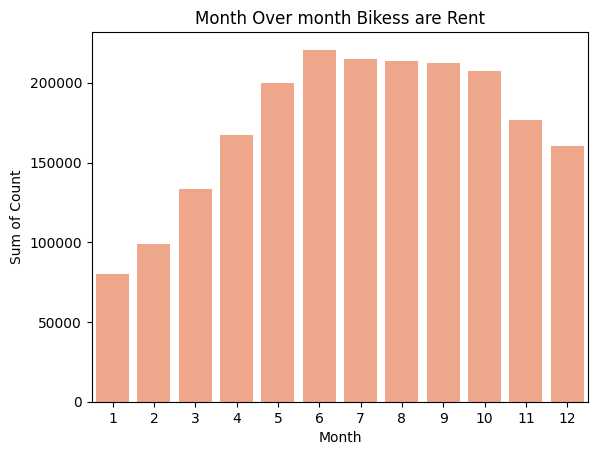

In [17]:
month_count = df.groupby(df["datetime"].dt.month)["count"].sum().reset_index().rename(columns = {"datetime":"Month","count":"Sum of Count"})
sns.barplot(data = month_count,x = "Month",y = "Sum of Count",color = "lightsalmon")
plt.title("Month Over month Bikess are Rent")
plt.show()

### OBSERVATIONS

Increasing Trend: Overall, bike rentals seem to increase as the months progress.
    
Seasonal Patterns: Look for patterns related to seasons (e.g., summer months having higher rentals).

### RECOMMODATIONS

Plan promotions or discounts during peak rental months.

### No of Bike Rent per Hour 

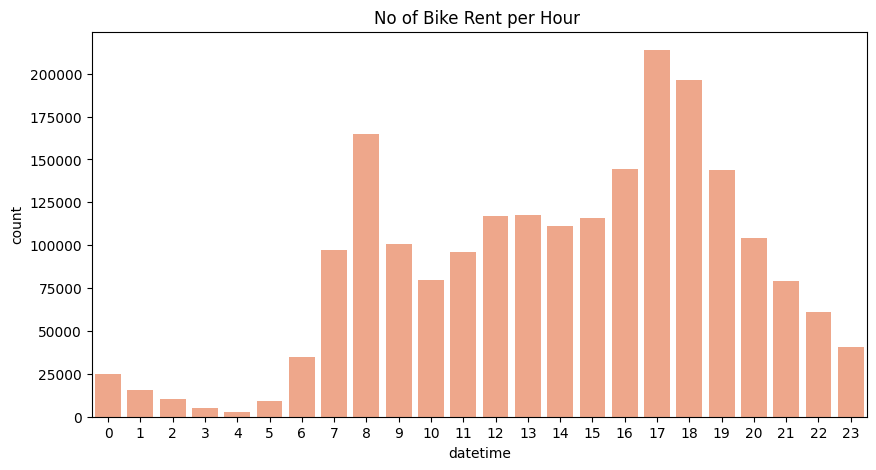

In [18]:
plt.figure(figsize = (10,5))
sum_count = df.groupby(by = df["datetime"].dt.hour)["count"].sum().reset_index()
plt.title("No of Bike Rent per Hour ")
sns.barplot(data = sum_count,x = "datetime",y = "count",color = "lightsalmon")
plt.show()

### OBSERVATIONS

Peak Hours: The highest number of bike rentals occurs between 17:00 and 18:00. This suggests that people are likely renting bikes after work hours, perhaps for commuting or leisure.

Morning Surge: There is a significant increase in bike rentals around 7:00 to 8:00, likely due to people commuting to work or school.

Low Activity: The early morning hours (0:00 - 5:00) and late evening hours (21:00 - 23:00) see much lower bike rental activity, which aligns with typical off-peak times.

### RECOMMODATIONS

Increase Bike Availability During Peak Hours: Ensure that there are sufficient bikes available during the morning (7:00 - 9:00) and evening (17:00 - 19:00) peaks to meet demand.

Maintenance Scheduling: Schedule bike maintenance during the low-demand hours (e.g., early morning or late night) to minimize disruption to users.

### Relation between Temperature and Atmospheric Temperature

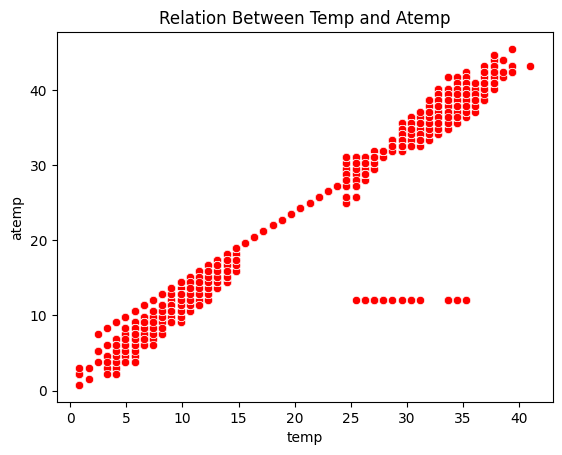

In [19]:
sns.scatterplot(data = df,x = "temp",y = "atemp",color = "red")
plt.title("Relation Between Temp and Atemp")
plt.show()



### OBSERVATIONS

There is a clear, almost perfect linear relationship between "temp" and "atemp." This suggests that as the actual temperature increases, the perceived or adjusted temperature increases at a consistent rate.


### Relation between Registered count and total count

            registered     count
registered    1.000000  0.970948
count         0.970948  1.000000



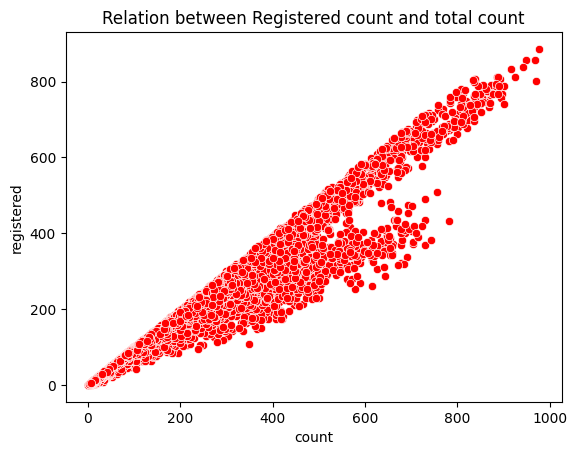

In [26]:
print(df[["registered","count"]].corr())
print("")
sns.scatterplot(data = df,x = "count",y = "registered",color = "red")
plt.title("Relation between Registered count and total count")
plt.show()



### OBSERVATIONS

There is a strong positive correlation between the total number of rentals and the number of rentals by registered users. As the total number of rentals increases, the number of registered user rentals also increases proportionally.

### Relation Between Atmospheric Temperature and Count

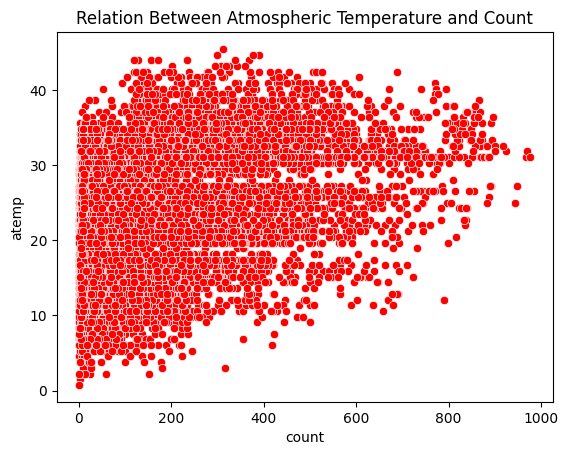

In [21]:
sns.scatterplot(data = df,y= "atemp",x = "count",color = "red")
plt.title("Relation Between Atmospheric Temperature and Count")
plt.show()

### OBSERVATIONS

As the total count of bike rentals increases, the registered count tends to increase as well.

Most dots follow a line, suggesting a linear relationship between the two variables.

### Relation Between Temperature and Count

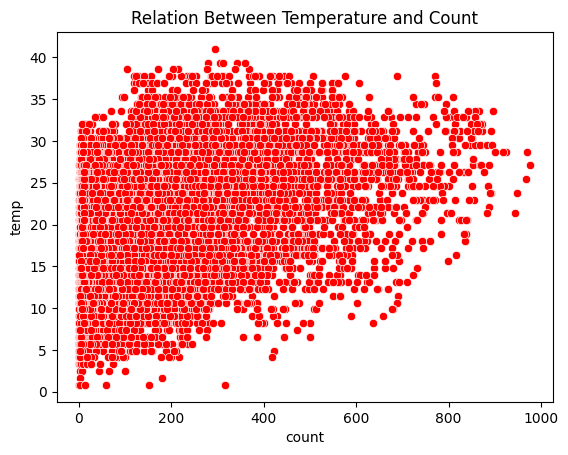

In [22]:
sns.scatterplot(data = df,y= "temp",x = "count",color = "red")
plt.title("Relation Between Temperature and Count")
plt.show()

### OBSERVATIONS

As the total count of bike rentals (“count”) increases, the number of registered users (“registered”) tends to increase as well.

This could indicate that people prefer biking during warmer weather.

### RECOMDATIONS

During warmer months, consider targeted promotions to encourage more bike rentals.

### Heatmap

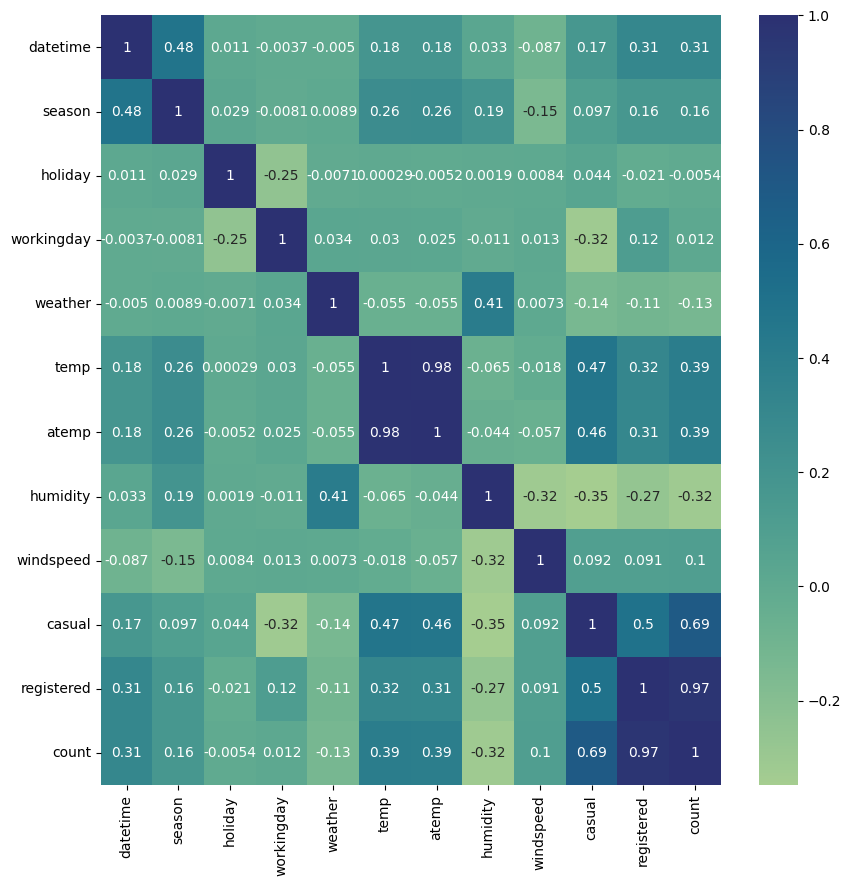

In [25]:
data = df.drop(columns = "Time_divisions")
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(),annot = True,cmap="crest")
plt.show()

### OBSERVATIONS

The heatmap visually represents the correlation between different variables related to bike sharing demand.

Darker blue squares indicate positive correlation, while darker red squares indicate negative correlation.

Season and Holiday: Positive correlation with bike rentals during certain seasons or holidays.

Working Day: Negative correlation with bike rentals on working days.

Temperature (Temp and Atemp): Positive correlation with bike rentals.

Humidity: Negative correlation with bike rentals.

Registered and Casual Users: Both positively correlate with total bike rentals.

### RECOMMODATIONS

Promote biking during pleasant weather

# Hypothesis Testing

#### T-Test

#### If there is a Significant different betweeen Working and Non-Working day

In [27]:
work_day = df[df["workingday"] == 0]["count"]
non_work_day = df[df["workingday"] == 1]["count"]

alpha = 0.05

sqrt_method = {"work_day":np.sqrt(work_day).skew(),"non_work_day":np.sqrt(non_work_day).skew()}
print("Skew Value :",sqrt_method)
print(" ")

t_stats,p_value = ttest_ind(np.sqrt(work_day),np.sqrt(non_work_day))

print("T-statistics :",t_stats)
print("P-value :",p_value)
print(" ")

if alpha > p_value:
    print("Reject Null Hypothesis H0")
    print("There is a Significant Difference Between Two groups")
else:
    print("Fail to Reject The Null Hypothesis H0")
    print("There is No Significant Difference Between Two Groups")



Skew Value : {'work_day': 0.2500461110063407, 'non_work_day': 0.26022113284731074}
 
T-statistics : -0.34827565362823426
P-value : 0.7276399120700004
 
Fail to Reject The Null Hypothesis H0
There is No Significant Difference Between Two Groups


### OBSERVATION

There is no significant difference in bike rentals between working days and non-working days.

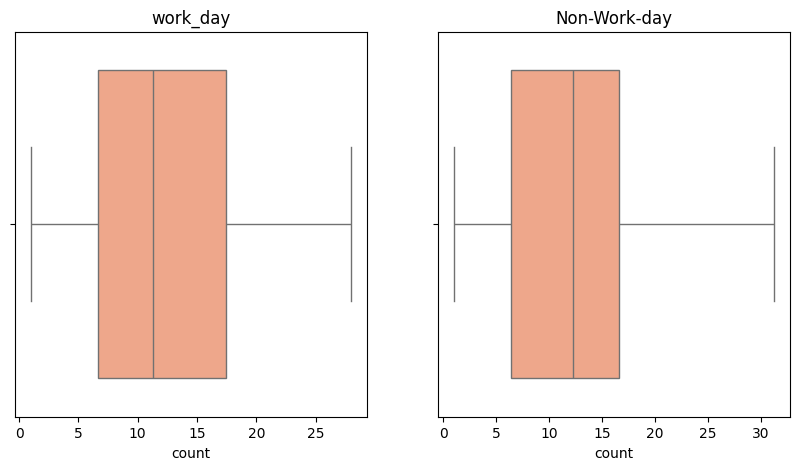

In [29]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x = np.sqrt(work_day),color = "lightsalmon")
plt.title("work_day")
plt.subplot(1,2,2)
sns.boxplot(x = np.sqrt(non_work_day),color = "lightsalmon")
plt.title("Non-Work-day")
plt.show()

####  if there is a significant difference between bike rentals on holidays and non-holidays.

In [31]:
holiday = df[df["holiday"] == 0]["count"]
non_holiday = df[df["holiday"] == 1]["count"]
alpha = 0.05
sqrt_method = {"holiday":np.sqrt(holiday).skew(),"non_holiday":np.sqrt(non_holiday).skew()}
print("Skew Value :",sqrt_method)

t_stats,p_value = ttest_ind(np.sqrt(holiday),np.sqrt(non_holiday))

print("T-statistics :",t_stats)
print("P-value :",p_value)


if alpha > p_value:
    print("Reject Null Hypothesis H0")
    print("There is a Significant Difference Between Two groups affect the bike Rentals")
else:
    print("Fail to Reject The Null Hypothesis H0")
    print("There is No Significant Difference Between Two Groups affect the bike Rentals")


Skew Value : {'holiday': 0.2604653407901246, 'non_holiday': 0.1525202168162216}
T-statistics : 0.41841565847201573
P-value : 0.6756514954888171
Fail to Reject The Null Hypothesis H0
There is No Significant Difference Between Two Groups affect the bike Rentals


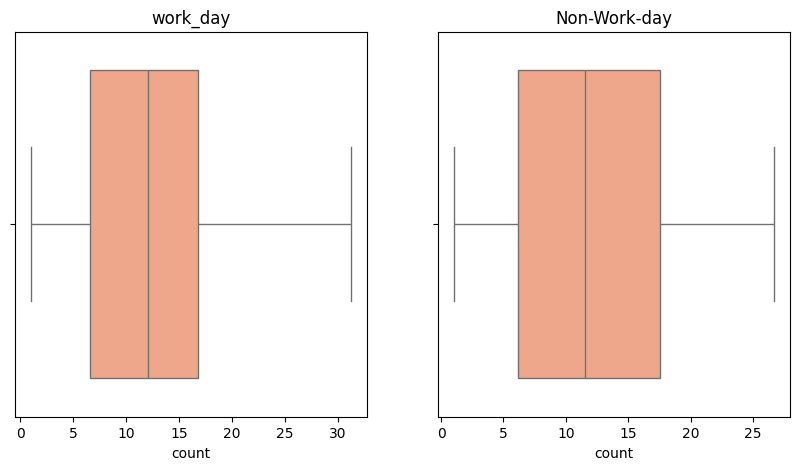

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.boxplot(x= np.sqrt(holiday),color = "lightsalmon")
plt.title("work_day")
plt.subplot(1,2,2)
sns.boxplot(x = np.sqrt(non_holiday),color = "lightsalmon")
plt.title("Non-Work-day")
plt.show()

#### Kruskal Test

#### Does the season significantly affect the number of  bike rentals?

In [33]:
spring_1 = df[df["season"] == 1]["count"]
summer_2 = df[df["season"] == 2]["count"]
fall_3 = df[df["season"] == 3]["count"]
winter_4 = df[df["season"] == 4]["count"]


h_stats,p_value = kruskal(spring_1,summer_2,fall_3,winter_4)
alpha = 0.05

print("H-statistics :",h_stats)
print("P-value :",p_value)

if alpha > p_value:
    print("Reject Null Hypothesis H0")
    print("There is a significant difference Between atleast one groups")
else:
    print("Fail to Reject the Null Hypothesis H0")
    print("There is no significant difference Between  groups")

H-statistics : 699.6668548181988
P-value : 2.479008372608633e-151
Reject Null Hypothesis H0
There is a significant difference Between atleast one groups


#### Do different different weather conditions that affect the number of bike rentals?

In [34]:
clear_1 = df[df["weather"] == 1]["count"]
cloudy_2 = df[df["weather"] == 2]["count"]
light_snow_3 = df[df["weather"] == 3]["count"]
heavy_rain_4 = df[df["weather"] == 4]["count"]

h_stats,p_value = kruskal(clear_1,cloudy_2,light_snow_3)
alpha = 0.05

print("H-statistics :",h_stats)
print("P-value :",p_value)

if alpha > p_value:
    print("Reject Null Hypothesis H0")
    print("There is a significant difference Between all groups")
else:
    print("Fail to Reject the Null Hypothesis H0")
    print("There is a significant difference Between all groups")

H-statistics : 204.95566833068537
P-value : 3.122066178659941e-45
Reject Null Hypothesis H0
There is a significant difference Between all groups


### Chisquare Test

#### Do different seasons experience different weather conditions that affect the number of bike rentals?"

In [37]:
chi2_contingency(pd.crosstab(df["season"],df["weather"]))

Chi2ContingencyResult(statistic=49.158655596893624, pvalue=1.549925073686492e-07, dof=9, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]]))

#### Holidays and working days Does affect the bike rent  

In [38]:
chi2_contingency(pd.crosstab(df["holiday"],df["workingday"]))

Chi2ContingencyResult(statistic=679.8303606566715, pvalue=7.274717892533614e-150, dof=1, expected_freq=array([[3374.75197501, 7200.24802499],
       [  99.24802499,  211.75197501]]))

## Bike are Rent Different Time And Hypothsis Testing s this significant different are not between time divisions

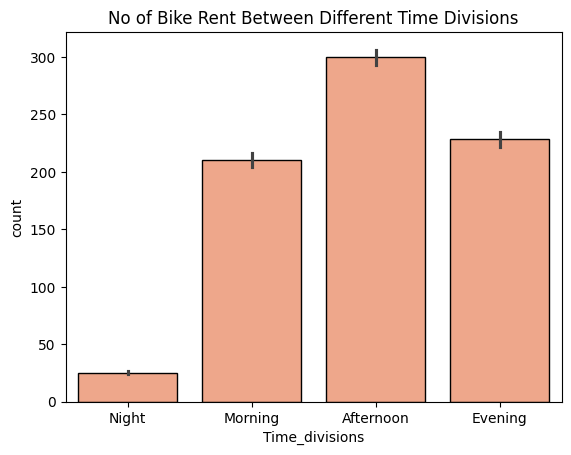

In [50]:
sns.barplot(data = df,x = "Time_divisions",y = "count",edgecolor = "black",color = "lightsalmon")
plt.title("No of Bike Rent Between Different Time Divisions")
plt.show()

### OBSERVATIONS

Morning: Represents bike rentals during the morning hours.

Afternoon: Shows the highest count of bike rentals, suggesting peak usage.

Evening: Indicates another peak in bike rentals.

Night: Has the lowest count, likely due to reduced demand during nighttime.

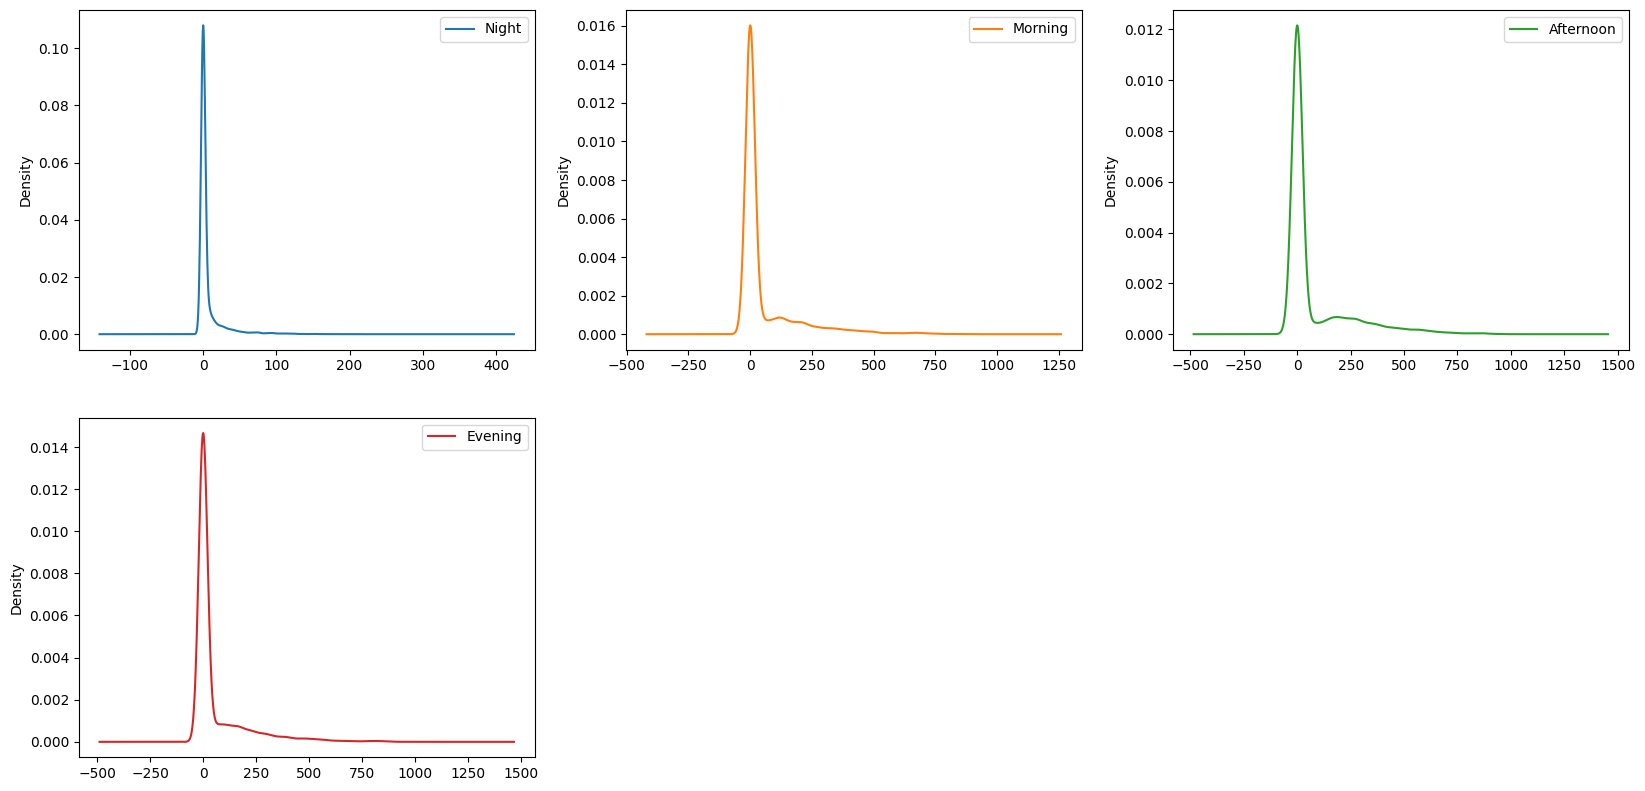

In [51]:
pivot_tab = pd.pivot(df,columns = "Time_divisions",values = "count")

pivot_tab.fillna(0,inplace = True)

pivot_tab.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False,figsize  = (20,15))
plt.show()

In [52]:
morning = df[df["Time_divisions"] == "Morning"]["count"]
afternoon = df[df["Time_divisions"] == "Afternoon"]["count"]
evening = df[df["Time_divisions"] == "Evening"]["count"]
night = df[df["Time_divisions"] == "Night"]["count"]

alpha = 0.05

print(pivot_tab.skew())

Time_divisions
Night        4.921897
Morning      2.902110
Afternoon    2.369472
Evening      2.948601
dtype: float64


In [53]:
# Test for Data is Normally Distributed Or Not using Shapiro-Test
shapiro(np.sqrt(morning))

ShapiroResult(statistic=0.9906546350681144, pvalue=2.362668727356925e-12)

In [55]:
k_stats,p_value = kruskal(np.sqrt(morning),np.sqrt(afternoon),np.sqrt(evening),np.sqrt(night))

print("Statsistics :",k_stats)
print("P-value :",p_value)
if alpha < p_value:
    print("Fail To Reject the NUll Hypothesis")
    print("There is No Significant Different between Groups")
else :
    print("Reject the Null Hypothesis")
    print("There is Significant Different between Groups")


Statsistics : 5447.021986938038
P-value : 0.0
Reject the Null Hypothesis
There is Significant Different between Groups
